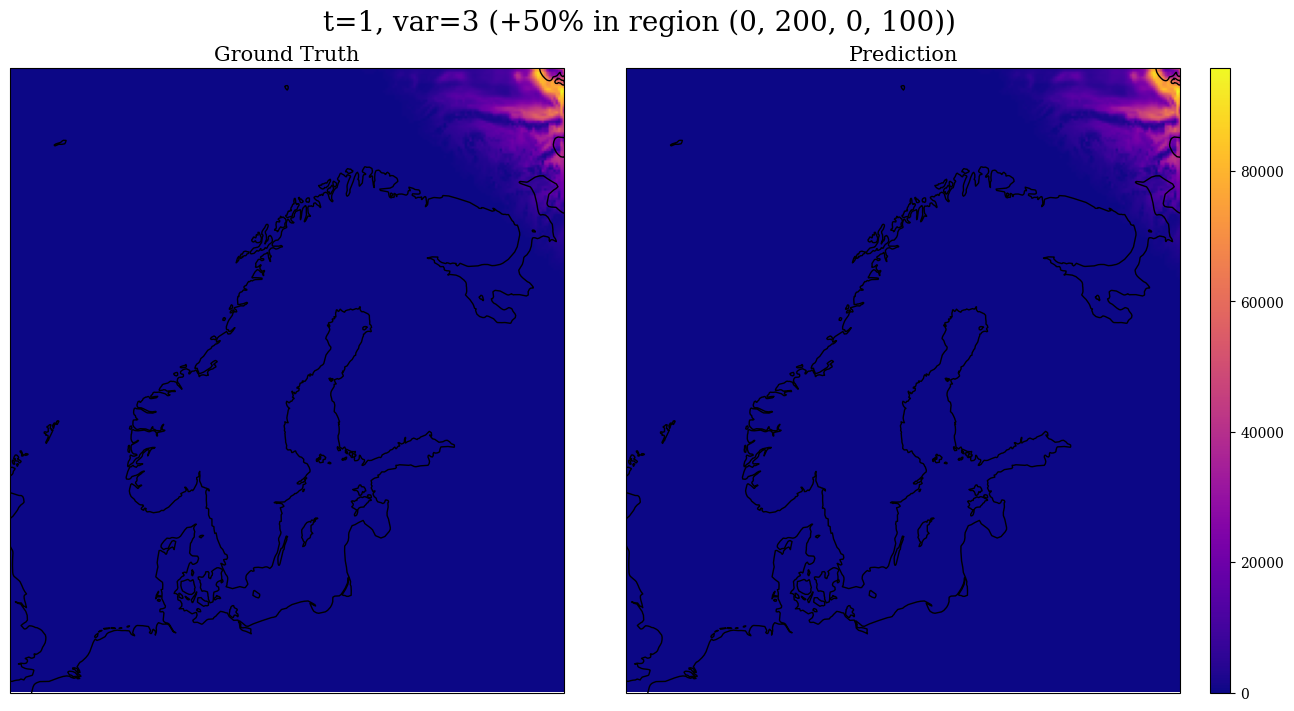

/var/folders/l1/5v8xnf4d2zgf9rs04m65gg100000gn/T/ipykernel_14848/1051942006.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


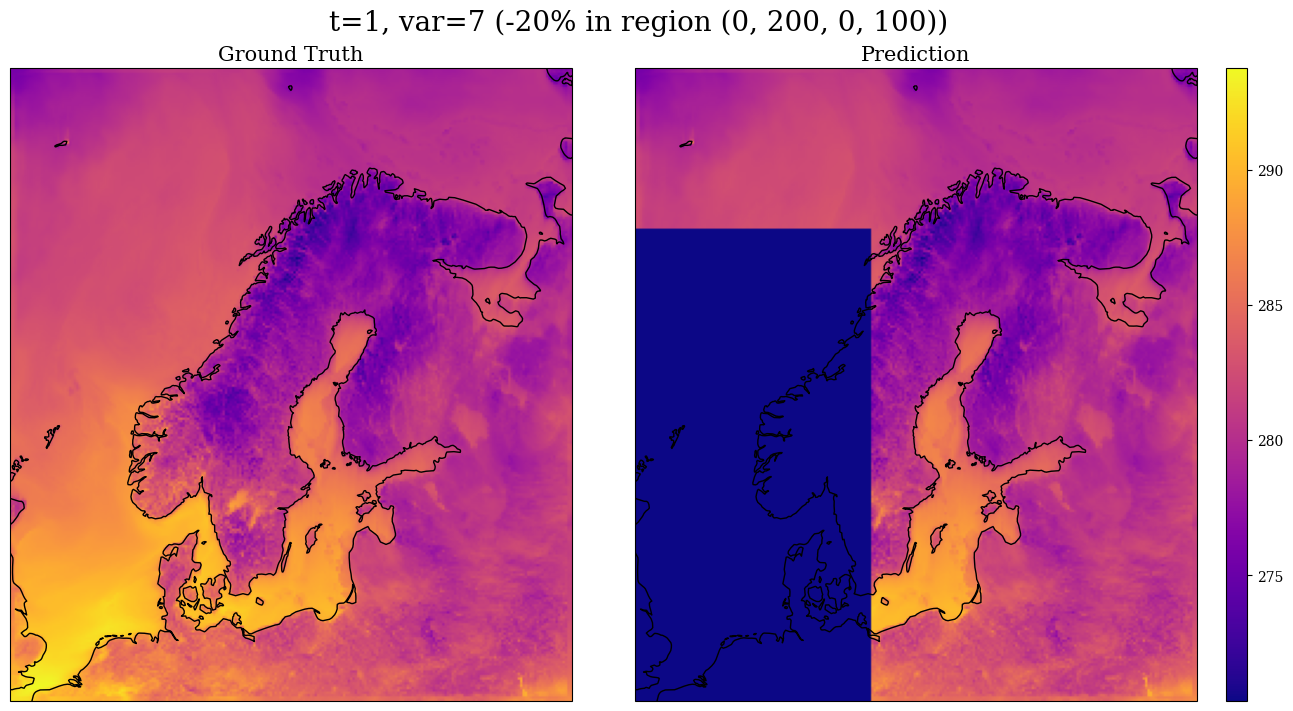

/var/folders/l1/5v8xnf4d2zgf9rs04m65gg100000gn/T/ipykernel_14848/1051942006.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


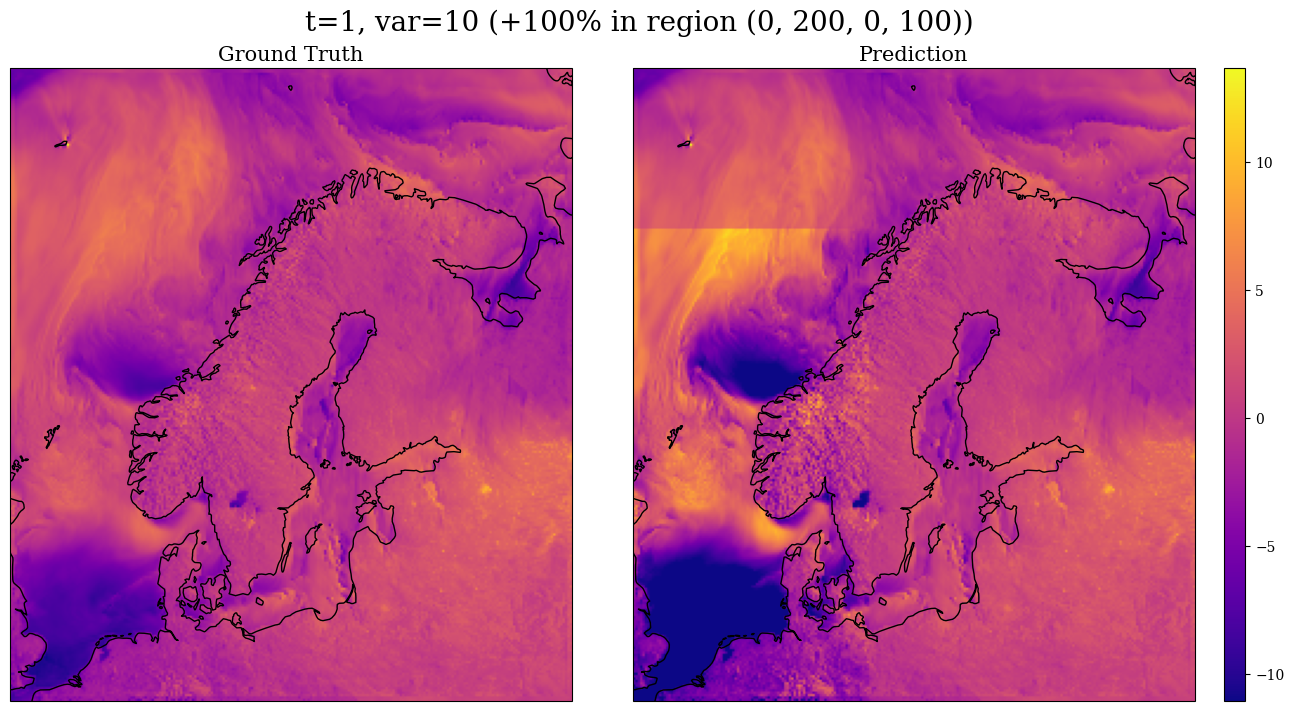

/var/folders/l1/5v8xnf4d2zgf9rs04m65gg100000gn/T/ipykernel_14848/1051942006.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [83]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
from neural_lam import vis
from IPython.display import display

# --- Configurable parameters ---
var_changes = {3: 0.5, 7: -0.2, 10: 1.0}  # {var_idx: percent_change}
region = (0, 200, 0, 100)  # (y_start, y_end, x_start, x_end)
plot_timestep = 1   # Only plot t=1

# --- File paths ---
archive_folder = "/Users/ashleyturner/Development/imperial/research_project/msc_research_project/neural-lam/data/meps_example_archive/samples/test"
online_folder = "/Users/ashleyturner/Development/imperial/research_project/msc_research_project/neural-lam/data/meps_online/samples/test"
filename = "nwp_2022090100_mbr000.npy"
archive_path = os.path.join(archive_folder, filename)
online_path = os.path.join(online_folder, filename)

# --- Load data ---
data_ref = np.load(archive_path)
data_edited = data_ref.copy()

# --- Apply changes to subregion for t=0 and t=1 ---
y_start, y_end, x_start, x_end = region
for t in [0, 1]:
    for var_idx, percent_change in var_changes.items():
        data_edited[t, y_start:y_end, x_start:x_end, var_idx] *= (1 + percent_change)

# --- Save edited file ---
np.save(online_path, data_edited)

# --- Reload edited data for plotting ---
data_edited = np.load(online_path)

# --- Plot full grid for each variable ---
for var_idx, percent_change in var_changes.items():
    grid_before = data_ref[plot_timestep, :, :, var_idx]
    grid_after = data_edited[plot_timestep, :, :, var_idx]

    data_flat_before = grid_before.reshape(-1)
    data_flat_after = grid_after.reshape(-1)
    obs_mask = torch.ones_like(torch.from_numpy(data_flat_before)).float()

    # Use the same color scale for both
    vmin = np.nanmin(data_flat_before)
    vmax = np.nanmax(data_flat_before)

    # Plot with vis.plot_prediction (full grid, colorbar included)
    vis_fig = vis.plot_prediction(
        torch.from_numpy(data_flat_after),
        torch.from_numpy(data_flat_before),
        obs_mask,
        title=f"t={plot_timestep}, var={var_idx} ({percent_change:+.0%} in region {region})",
        vrange=(vmin, vmax)
    )
    display(vis_fig)
    plt.close(vis_fig)

    # Optional: Your own side-by-side plot (no colorbar)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    im0 = axes[0].imshow(grid_before, origin="lower", cmap="plasma", vmin=vmin, vmax=vmax)
    axes[0].set_title(f"Original t={plot_timestep}, var={var_idx}")
    im1 = axes[1].imshow(grid_after, origin="lower", cmap="plasma", vmin=vmin, vmax=vmax)
    axes[1].set_title(f"Edited t={plot_timestep}, var={var_idx} ({percent_change:+.0%} in region)")
    fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02)
    plt.tight_layout()
    #display(fig)
    plt.close(fig)